# Versuch 5
# Digitalisierung

In [3]:
import math

import matplotlib.pyplot as plt

import csv
import numpy as np

#import redlab as rl
import time
import matplotlib.pyplot as plt

## Aufgabe 1

In [ ]:
# -*- coding: utf-8 -*-

def plotMessreihe(messreihe, filename):
    plt.title("Messreihe " + filename)
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Volt (V)")
    
    plt.plot(messreihe)
    plt.savefig('PNG/plt' + filename + '.png', dpi=900)
    plt.show()
    

sin = []

for i in range(30):
    sin.append(np.sin(2*np.pi / 30 * i) + 1)

while(True):
    print("Wert eingeben")
    wert = input()
    
    if wert == -1:
        break
    
    print("------- einzelne Werte -------------------------")
    #print("16 Bit Value: " + str(rl.cbAIn(0,0,1)))
    print("Voltage Value: " + str(rl.cbVIn(0,0,1)))
    print("------- Messreihe -------------------------")
    print("Messreihe: " + str(rl.cbAInScan(0,0,0,300,8000,1)))
    print("Messreihe: " + str(rl.cbVInScan(0,0,0,300,8000,1)))
    messreihe = rl.cbVInScan(0,0,0,1000,8000,1)
    print("------- Ausgabe -------------------------")
    #print("Voltage Value: " + str(rl.cbVOut(0,0,101,2.5)))
    #print("Voltage Value: " + str(rl.cbVOut(0,0,101,wert)))
    
    plotMessreihe(messreihe, wert)
    
while(True):
    for i in sin:
        rl.cbVOut(0,0,101,i)
        time.sleep(0.01)
        

# Vermutlich das bessere

# -*- coding: utf-8 -*-
import redlab as rl

print("------- einzelne Werte -------------------------")
print("16 Bit Value: " + str(rl.cbAIn(0, 0, 1)))
print("Voltage Value: " + str(rl.cbVIn(0, 0, 1)))

print("------- Messreihe -------------------------")
print("Messreihe: " + str(rl.cbAInScan(0, 0, 0, 300, 8000, 1)))
print("Messreihe: " + str(rl.cbVInScan(0, 0, 0, 300, 8000, 1)))
# print("Samplerate: " + str(rl.cbInScanRate(0,0,0,8000)))
print("------- Ausgabe -------------------------")


def get_in():
    while True:
        in_put = input()
        if in_put != "x":
            rl.cbVOut(0, 0, 101, float(in_put))
            print("Voltage Value: " + in_put)
        elif in_put == "x":
            break


if __name__ == "__main__":
    get_in()


## idk, vermutlich löschen

In [7]:
#todo: daten aus exel in python datenstruktur (oder array) einlesen
#todo: routine schreiben, die sinusspannung ausgibt
#todo: aufgabe 1, 2, 3, 4, 5 bearbeiten und berechnen und überprüfen
# alles was gemacht ist, wird aus todo rausgenommen und kommentiert oder als done markiert
#-> scheiß auf das meiste
#todo: add all pngs

#df = np.genfromtext('daten.csv' + str(distance[idx]) + 'cm.csv', delimiter=";",
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})
n = df.to_numpy()

voltage_ad = []
keithley_ad = []
multi_ad = []
wandler_ad = []
pico_ad = []

voltage_da = []
keithley_da = []
multi_da = []
pico_da = []

for i in range(1, len(n)):
    if i < len(n) - 1:
        voltage_ad.append(n[i][0])
        keithley_ad.append(n[i][1])
        multi_ad.append(n[i][2])
        wandler_ad.append(n[i][3])
        pico_ad.append(n[i][4])
    voltage_da.append(n[i][6])
    keithley_da.append(n[i][7])
    multi_da.append(n[i][8])
    pico_da.append(n[i][9])


def main():
    # Aufgabe 2 Messfehler berechnen AD-Wandlung
    messfehler_multi = get_messfehler(keithley_ad, multi_ad)
    messfehler_wandler = get_messfehler(keithley_ad, wandler_ad)
    std_multi = get_standardabweichung(messfehler_multi)
    std_wandler = get_standardabweichung(messfehler_wandler)

    print("AD-Wandlung")
    print("Theoretischer Quantisierungsfehler: " + str(theoretischer_quantisierungsfehler(-10, 10, 11)))
    print("Standardabweichung Multimeter Voltcraft: " + str(std_multi))
    print("Standardabweichung AD-Wandler: " + str(std_wandler) + "\n")

    # Aufgabe 3 Messfehler berechnen DA-Wandlung
    messfehler_m = get_messfehler(voltage_da, keithley_da)
    # messfehler_multi = get_messfehler(keithley_da, multi_da)
    # messfehler_pico = get_messfehler(keithley_da, pico_da)
    std_m = get_standardabweichung(messfehler_m)
    # std_multi = get_standardabweichung(messfehler_multi)
    # std_pico = get_standardabweichung(messfehler_pico)

    print("DA-Wandlung")
    print("Theoretischer Quantisierungsfehler: " + str(theoretischer_quantisierungsfehler(0, 5, 10)))
    print("Standardabweichung: " + str(std_m))
    # print("Standardabweichung Multimeter Voltcraft: " + str(std_multi))
    # print("Standardabweichung PicoScope: " + str(std_pico) + "\n")

    plot_sin()

    for i in range(2, 9):
        if i < 5:
            plot_kurve("plt" + str(i) + "000", 50)
        elif i < 8:
            plot_kurve("plt" + str(i) + "000", 100)
        else:
            plot_kurve("plt" + str(i) + "000", 1000)


def theoretischer_quantisierungsfehler(u_min, u_max, bit):
    return (u_max - u_min) / 2**bit


# Arrays übergeben, gibt Array mit den Messfehlern zurück
def get_messfehler(ref, arr):
    messfehler = []
    for i in range(0, len(ref)):
        messfehler.append(ref[i] - arr[i])

    return messfehler


def get_standardabweichung(messfehler):
    sum = 0.0
    for m in messfehler:
        sum += m**2

    return math.sqrt((1.0 / (len(messfehler) - 1.0)) * sum)

# Aufgabe 4 sinusschwingung
def plot_sin():
    values_x = []
    values_y = []
    with open('sinus_pico.csv', newline='') as csvfile:
        messung = list(csv.reader(csvfile, delimiter=';'))

        for i in range(3, len(messung)):
            values_x.append(float(messung[i][0].replace(",", ".")))
            values_y.append(float(messung[i][1].replace(",", ".")))

    plt.title("Sinus")
    plt.xlabel("ms")
    plt.ylabel("Volt")
    plt.plot(values_x, values_y)
    plt.savefig("Sinusschwingung.png", dpi=900)
    plt.show()

# Aufgabe 5
# tatsächliche Abtastfrequenz mit cbInScanRate()
def plot_kurve(name, samples):
    arr = np.load('PltData/' + name + '.npy')

    plt.title(name)
    plt.xlabel("Samples")
    plt.ylabel("Spannung (V)")
    plt.plot(arr[:samples])
    plt.savefig(name + ".png", dpi=900)
    plt.show()


main()

#Aufgabe 5: abtastfrequenz selbst festlegen z.b. 6500! daraus berechnen sich die anderen dinge
# fequenz bei den funktionen mitangeben, diese wird von der hardware nicht angegeben und kann nicht abgefragt werden, daher wird davon ausgegangen, das sie eben so kommt
# wenn die abtastfrequenz und die frequenz identisch sind ergebnis: eine gerade, weil sinus immer an der identische stelle abgetasted wird.
# -> schwingung, da das nicht so möglisch





ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

## Aufgabe 2

In [7]:
# 2.1
bits = 11
accuracy = (1 / (np.power(2, bits)))
delta = ((10 - (-10)) / (np.power(2, bits)))
print("Genauigkeit des 11-Bit AD-Wandlers: ", accuracy)
print(f"Theoretischer Quantisierungsfehler des 11-Bit AD-Wandlers: {delta} V")
print()

# 2.3
data = np.genfromtxt('./2_2.csv',
                     delimiter=';',
                     skip_header=1,
                     converters={0: lambda s: int(s.decode('utf-8').replace(',', '.')),
                                 1: lambda s: float(s.decode('utf-8').replace(',', '.')),
                                 2: lambda s: float(s.decode('utf-8').replace(',', '.')),
                                 3: lambda s: float(s.decode('utf-8').replace(',', '.')),
                                 4: lambda s: float(s.decode('utf-8').replace(',', '.')),
                                 5: lambda s: int(s.decode('utf-8').replace(',', '.'))},
                     dtype=str)
zipped_data = list(zip(*data))
ref = zipped_data[2]  # Feinmessgerät
multi = zipped_data[1]  # Multi
adw = zipped_data[3]  # AD-Wandler

messfehler_multi = []
messfehler_adw = []
for i, el in enumerate(ref):
    messfehler_multi.append(el - multi[i])
    messfehler_adw.append(el - adw[i])

messfehler_multi = np.array(messfehler_multi)
messfehler_adw = np.array(messfehler_adw)
print(f"Messfehler Multi: {np.mean(messfehler_multi)}")
print(f"Messfehler AD-Wandler: {np.mean(messfehler_adw)}")
print()
std_multi = np.sqrt(np.abs((1 / len(zipped_data) - 1) * np.sum(messfehler_multi)))
std_adw = np.sqrt(np.abs((1 / len(zipped_data) - 1) * np.sum(messfehler_adw)))
print(f"Standardabweichung Multi: {std_multi}")
print(f"Standardabweichung AD-Wandler: {std_adw}")

Genauigkeit des 11-Bit AD-Wandlers:  0.00048828125
Theoretischer Quantisierungsfehler des 11-Bit AD-Wandlers: 0.009765625 V

Messfehler Multi: 0.07599999999999973
Messfehler AD-Wandler: 0.04643000000000012

Standardabweichung Multi: 0.7958224257542201
Standardabweichung AD-Wandler: 0.6220262588240689


## Aufgabe 3

In [6]:
# 3.1
bits = 10
accuracy = (1 / (np.power(2, bits)))
delta = (5 / (np.power(2, bits)))
print("Genauigkeit des 10-Bit AD-Wandlers: ", accuracy)
print(f"Theoretischer Quantisierungsfehler des 10-Bit AD-Wandlers: {delta} V")
print()

# 3.3
data = np.genfromtxt('./3_2.csv',
                     delimiter=';',
                     skip_header=1,
                     converters={0: lambda s: float(s.decode('utf-8').replace(',', '.')),
                                 1: lambda s: float(s.decode('utf-8').replace(',', '.'))},
                     dtype=str)

zipped_data = list(zip(*data))
volt = zipped_data[0]
pico = zipped_data[1]
diff = [volt[i] - pico[i] for i in range(len(volt))]

std_pico = np.sqrt(np.abs((1 / len(zipped_data) - 1) * np.sum(diff)))
print(f"Standardabweichung Pico: {std_pico}")

Genauigkeit des 10-Bit AD-Wandlers:  0.0009765625
Theoretischer Quantisierungsfehler des 10-Bit AD-Wandlers: 0.0048828125 V

Standardabweichung Pico: 0.5651106086422373


## Aufgabe 4.1

In [5]:
# -*- coding: utf-8 -*-

if __name__ == "__main__":
    while True:
        for i in range(0, 30):
            rl.cbVOut(0, 0, 101, np.sin(i / 30 * 2 * np.pi) + 1)  # plus eins da man keine negativen volt anzeigen kann.
            time.sleep(0.01)

NameError: name 'rl' is not defined

![test](4_2.png)

## Aufgabe 5

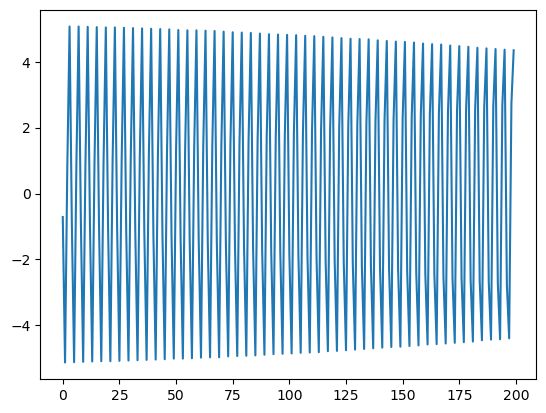

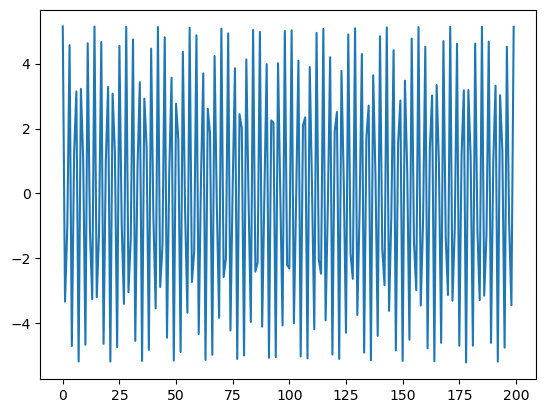

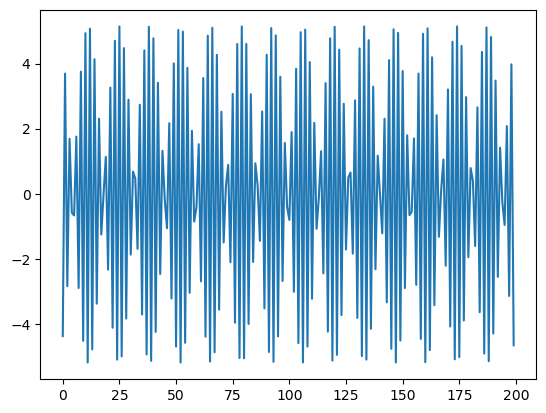

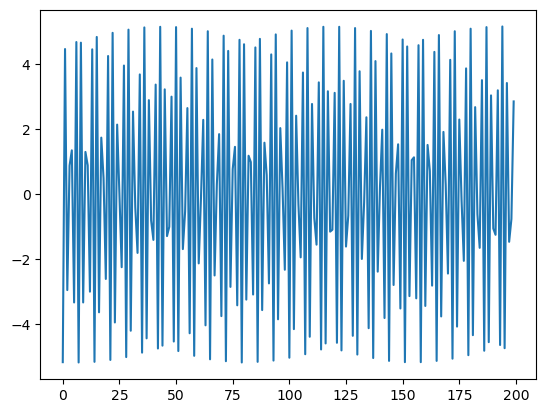

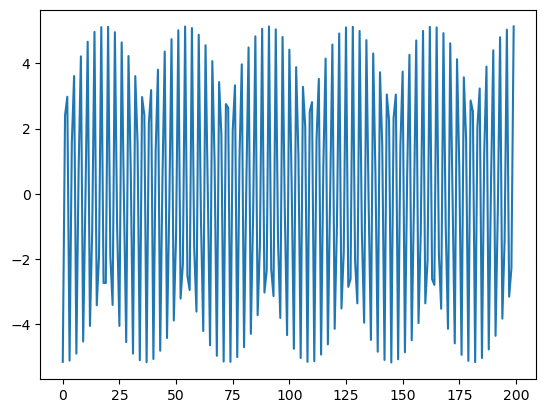

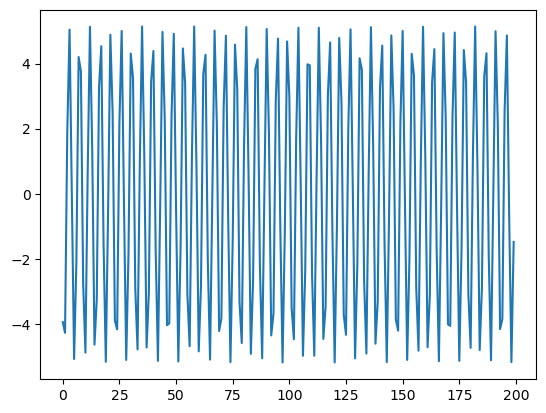

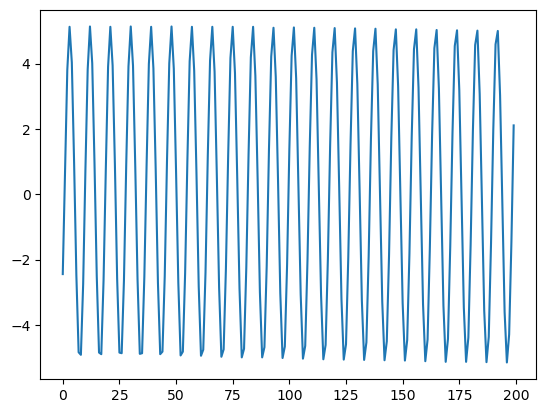

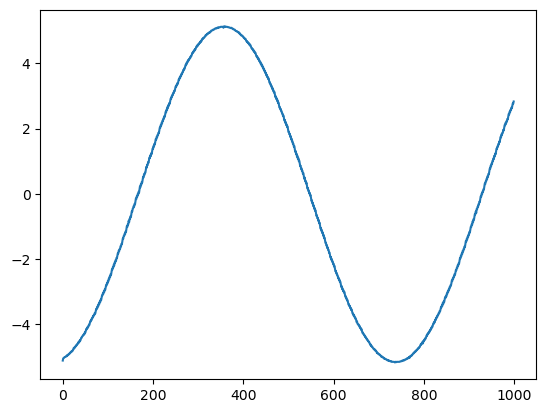

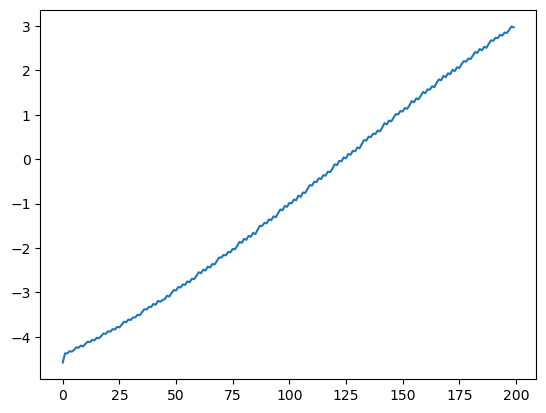

In [4]:
# -*- coding: utf-8 -*-


def record():
    data = rl.cbVInScan(0, 0, 0, 200, 8000, 1)
    np.save("aufgabe_5_8000_s200.npy", data)
    plt.plot(data)


def plot_data():
    freqs = ["2000", "2850", "3700", "4550", "5400", "6250", "7100", "8000_s1000", "8000_s200"]
    for i in freqs:
        data = np.load(f"aufgabe_5_{i}.npy")
        fig, ax = plt.subplots()
        ax.plot(data)
        fig.savefig(f"plots/aufgabe_5_{i}.png")


if __name__ == "__main__":
    # record()
    plot_data()